<a href="https://colab.research.google.com/github/pngy87/-PTDLNC-GOOGLE-COLAB/blob/main/%5BCHAPTER%203%5DPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PCA demonstration with reproducible numbers (no external libraries required beyond numpy/pandas/matplotlib)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Create a synthetic dataset with 3 features that are correlated
rng = np.random.default_rng(42)
n = 60

age = rng.integers(20, 61, size=n)  # 20..60
income = 1.6*age + rng.normal(0, 12, size=n) + 10   # positively correlated with age
spending = 100 - 0.8*age + rng.normal(0, 8, size=n)  # negatively correlated with age/income

df = pd.DataFrame({
    "Age": age.astype(float),
    "Income_kUSD": income.astype(float),
    "SpendingScore": spending.astype(float)
})

# 2) Standardize (z-score)
X = df.values
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=1)
X_std = (X - means) / stds

# 3) PCA via eigendecomposition of covariance matrix
cov = np.cov(X_std, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov)  # returns ascending
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

explained_variance_ratio = eigvals / eigvals.sum()

# 4) Components (loadings) and transformed scores
components = eigvecs.T  # each row is a component vector over original features
scores = X_std @ eigvecs  # PC coordinates



     Age  Income_kUSD  SpendingScore       PC1       PC2       PC3
0   23.0    72.499771      86.923081  2.101154  1.195748  0.755874
1   51.0    86.723020      58.412116 -1.233447 -0.127882 -0.195743
2   46.0    77.453087      59.813614 -0.626653 -0.346653 -0.174341
3   37.0    59.434727      69.762254  0.871073 -0.189462 -0.298121
4   37.0    76.591753      56.901325 -0.258694 -0.779365  0.443337
5   55.0   111.547668      44.423100 -2.856235 -0.537135  0.536508
6   23.0    45.432631      71.018403  2.094058 -0.718438  0.175872
7   48.0    76.718122      53.622025 -1.019859 -0.810742 -0.228894
8   28.0    44.906225      80.798194  2.322086  0.138813 -0.331423
9   23.0    54.607113      74.356168  1.994955 -0.230996  0.405919
10  41.0    84.519050      64.174700 -0.343826  0.068001  0.305291
11  60.0   112.517851      62.393826 -2.266335  1.000633 -0.057849
12  50.0    82.013884      57.149888 -1.106154 -0.362929 -0.254846
13  51.0    94.385936      65.100125 -1.123399  0.585798 -0.06

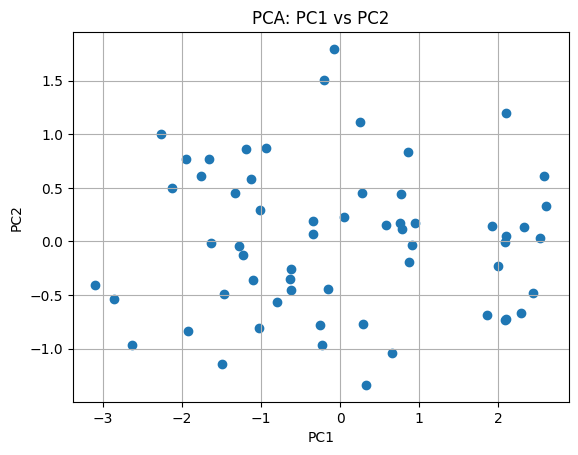

In [ ]:
# 5) Create outputs
explained_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(eigvals))],
    "ExplainedVariance": eigvals,
    "ExplainedVarianceRatio": explained_variance_ratio
})

components_df = pd.DataFrame(
    components,
    index=[f"PC{i+1}" for i in range(components.shape[0])],
    columns=df.columns
)

scores_df = pd.DataFrame(scores, columns=[f"PC{i+1}" for i in range(scores.shape[1])])
result_df = pd.concat([df.reset_index(drop=True), scores_df], axis=1)

print(result_df)

# 6) Print numeric summaries
print("Means (for standardization):", means.round(3))
print("Stds (for standardization):", stds.round(3))
print("\nExplained Variance Ratio per PC:")
for i, r in enumerate(explained_variance_ratio, 1):
    print(f"  PC{i}: {r:.4f}")

print("\nPCA Components (loadings): rows are PCs, columns are [Age, Income_kUSD, SpendingScore]")
print(np.round(components, 4))

# 7) Plot PC1 vs PC2
plt.figure()
plt.scatter(scores[:,0], scores[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2")
plt.grid(True)
plt.show()
